Image: aug_B2_PTX5_0_10hz_Image001_ICC_5.jpg - Black Area Ratio: 84.45%


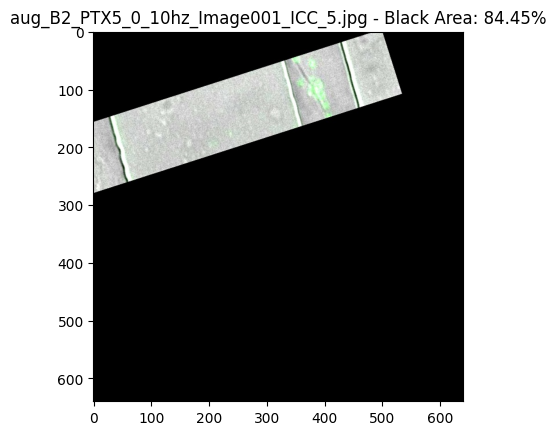

Image: aug_B3_1_Image001_ICC_7.jpg - Black Area Ratio: 70.02%


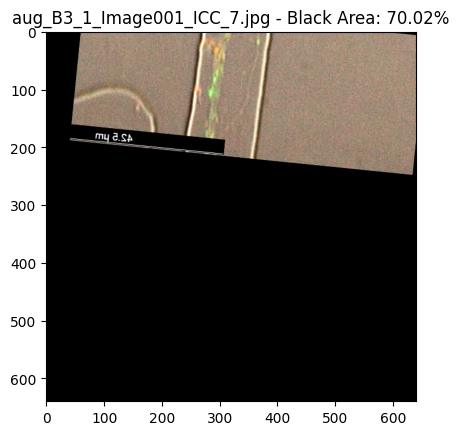

Image: aug_B3_1_Image001_ICC_rotate_6.jpg - Black Area Ratio: 91.99%


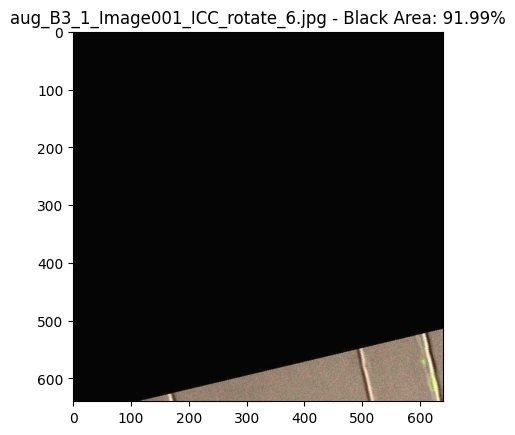

Image: aug_B4_1_Image006_ICC_4.jpg - Black Area Ratio: 67.57%


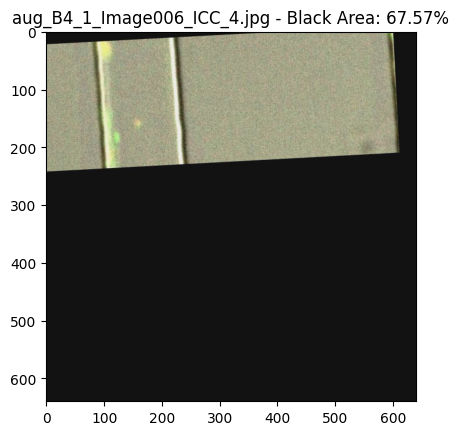

Image: aug_B4_1_Image006_ICC_5.jpg - Black Area Ratio: 75.51%


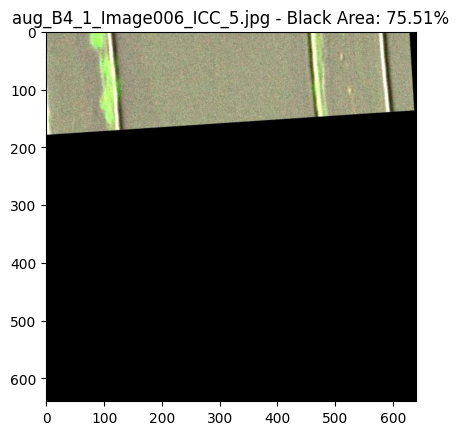

Deleted 59 images and corresponding labels.


In [2]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
#--------- Code Written by Khai Tha ----------------
def is_mostly_black(image_path, threshold=0.6, black_threshold=50):
    image = cv2.imread(image_path)
    if image is None:
        return False
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    black_pixels = np.sum(gray < black_threshold)
    total_pixels = gray.size
    black_ratio = black_pixels / total_pixels
    return black_ratio, black_ratio > threshold

def delete_images_with_large_black_areas(image_folder, label_folder, delete_threshold=0.6, black_threshold=50):
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    deleted_images = []
    
    # Preview for first 5 images flagged for deletion
    preview_count = 0
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        black_ratio, should_delete = is_mostly_black(image_path, delete_threshold, black_threshold)

        if should_delete:
            # Preview for the first 5 deletions
            if preview_count < 5:
                print(f"Image: {image_file} - Black Area Ratio: {black_ratio * 100:.2f}%")
                img = cv2.imread(image_path)
                plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                plt.title(f"{image_file} - Black Area: {black_ratio * 100:.2f}%")
                plt.show()
                preview_count += 1
            
            # Delete the image and its corresponding label
            os.remove(image_path)
            label_path = os.path.join(label_folder, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))
            if os.path.exists(label_path):
                os.remove(label_path)
            deleted_images.append(image_file)
    
    print(f"Deleted {len(deleted_images)} images and corresponding labels.")

# Example usage:
image_folder = "OGsplit/val_augment/images"
label_folder = "OGsplit/val_augment/labels"

delete_images_with_large_black_areas(image_folder, label_folder)
